In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve # has been decrated
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
import pickle

In [2]:
# ignore warnings
warnings.filterwarnings('ignore')

In [3]:
Columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level']

In [4]:
train_df = pd.read_csv("nsl-kdd-data/KDDTrain+.txt" , sep = "," , encoding = 'utf-8', names = Columns)
test_df  = pd.read_csv("nsl-kdd-data/KDDTest+.txt" , sep = "," , encoding = 'utf-8', names = Columns)

In [6]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [8]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
train_df.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [11]:
test_df.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [12]:
train_df.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

In [13]:
test_df.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


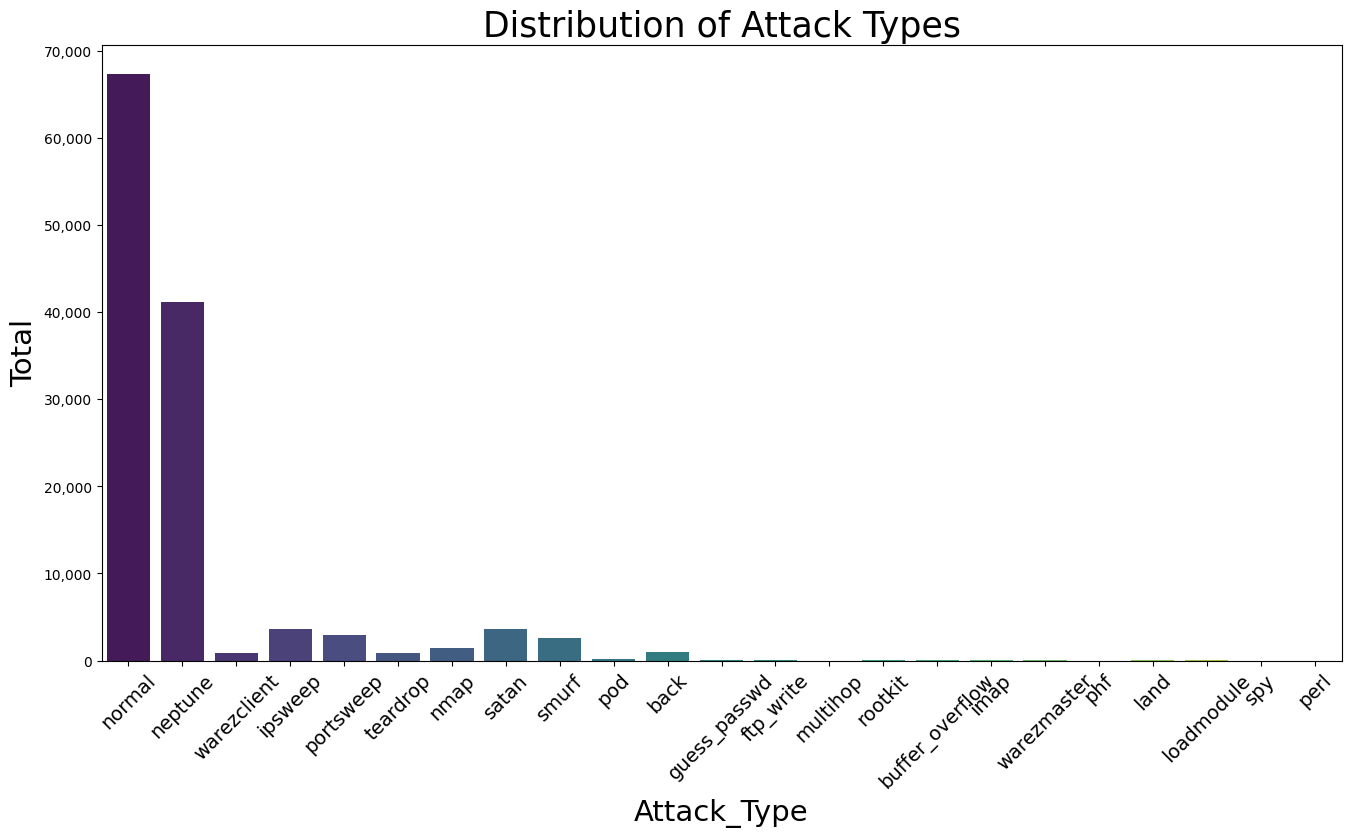

In [14]:
# Assuming 'train_df' contains NSL-KDD dataset
# If the 'attack' column is categorical, we want to encode it, but for now, we assume in usable form.

# Create a larger and clearer figure
plt.figure(figsize=(16, 8))

# Distribution of the 'attack' variable in the NSL-KDD dataset
sns.countplot(x='attack', data=train_df, palette='viridis')

# Set title and labels
plt.title('Distribution of Attack Types', fontsize=25)
plt.xlabel('Attack_Type', fontsize=21)
plt.ylabel('Total', fontsize=21)

# Increase the font size of x-axis tick labels
plt.xticks(rotation=45, fontsize=14)  # Rotating to prevent label overlap if there are many classes

# Format y-axis labels with commas
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Show the plot
plt.show()

In [15]:
def get_unique_values(dataframe, fields):
    ''' 
    get the unique values and their total from the given dataframe
    '''
    for names in fields:
        print(f"Field: {names}\n{'-'*30}")
        # Extract unique values and their counts
        unique_vals = dataframe[names].unique()
        value_counts = dataframe[names].value_counts()
        # Print the unique values and their counts
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Totals:\n{value_counts}\n{'='*40}\n")

# Select categorical features (object type) in the NSL-KDD dataset
categorical_features = train_df.select_dtypes(include='object').columns

# Let's print the unique values and the totals for categorical features
get_unique_values(train_df, categorical_features)

Field: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Totals:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Field: service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Totals:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
   

In [16]:
Results = set(train_df['attack'].values)
print(Results)

{'guess_passwd', 'warezmaster', 'pod', 'phf', 'satan', 'land', 'spy', 'warezclient', 'back', 'loadmodule', 'rootkit', 'neptune', 'ftp_write', 'smurf', 'nmap', 'buffer_overflow', 'imap', 'portsweep', 'teardrop', 'perl', 'ipsweep', 'multihop', 'normal'}


In [17]:
# classify the attacks

Trained_attack = train_df.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

train_df['attack_state'] = Trained_attack
test_df['attack_state'] = Tested_attack

In [18]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,1


In [19]:
test_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,1
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,0
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,0
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,1
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,0
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,1


In [20]:
# Checking for Missing Data
print(train_df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [21]:
print(test_df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [22]:
# Checking for Duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [23]:
train_df.shape

(125973, 44)

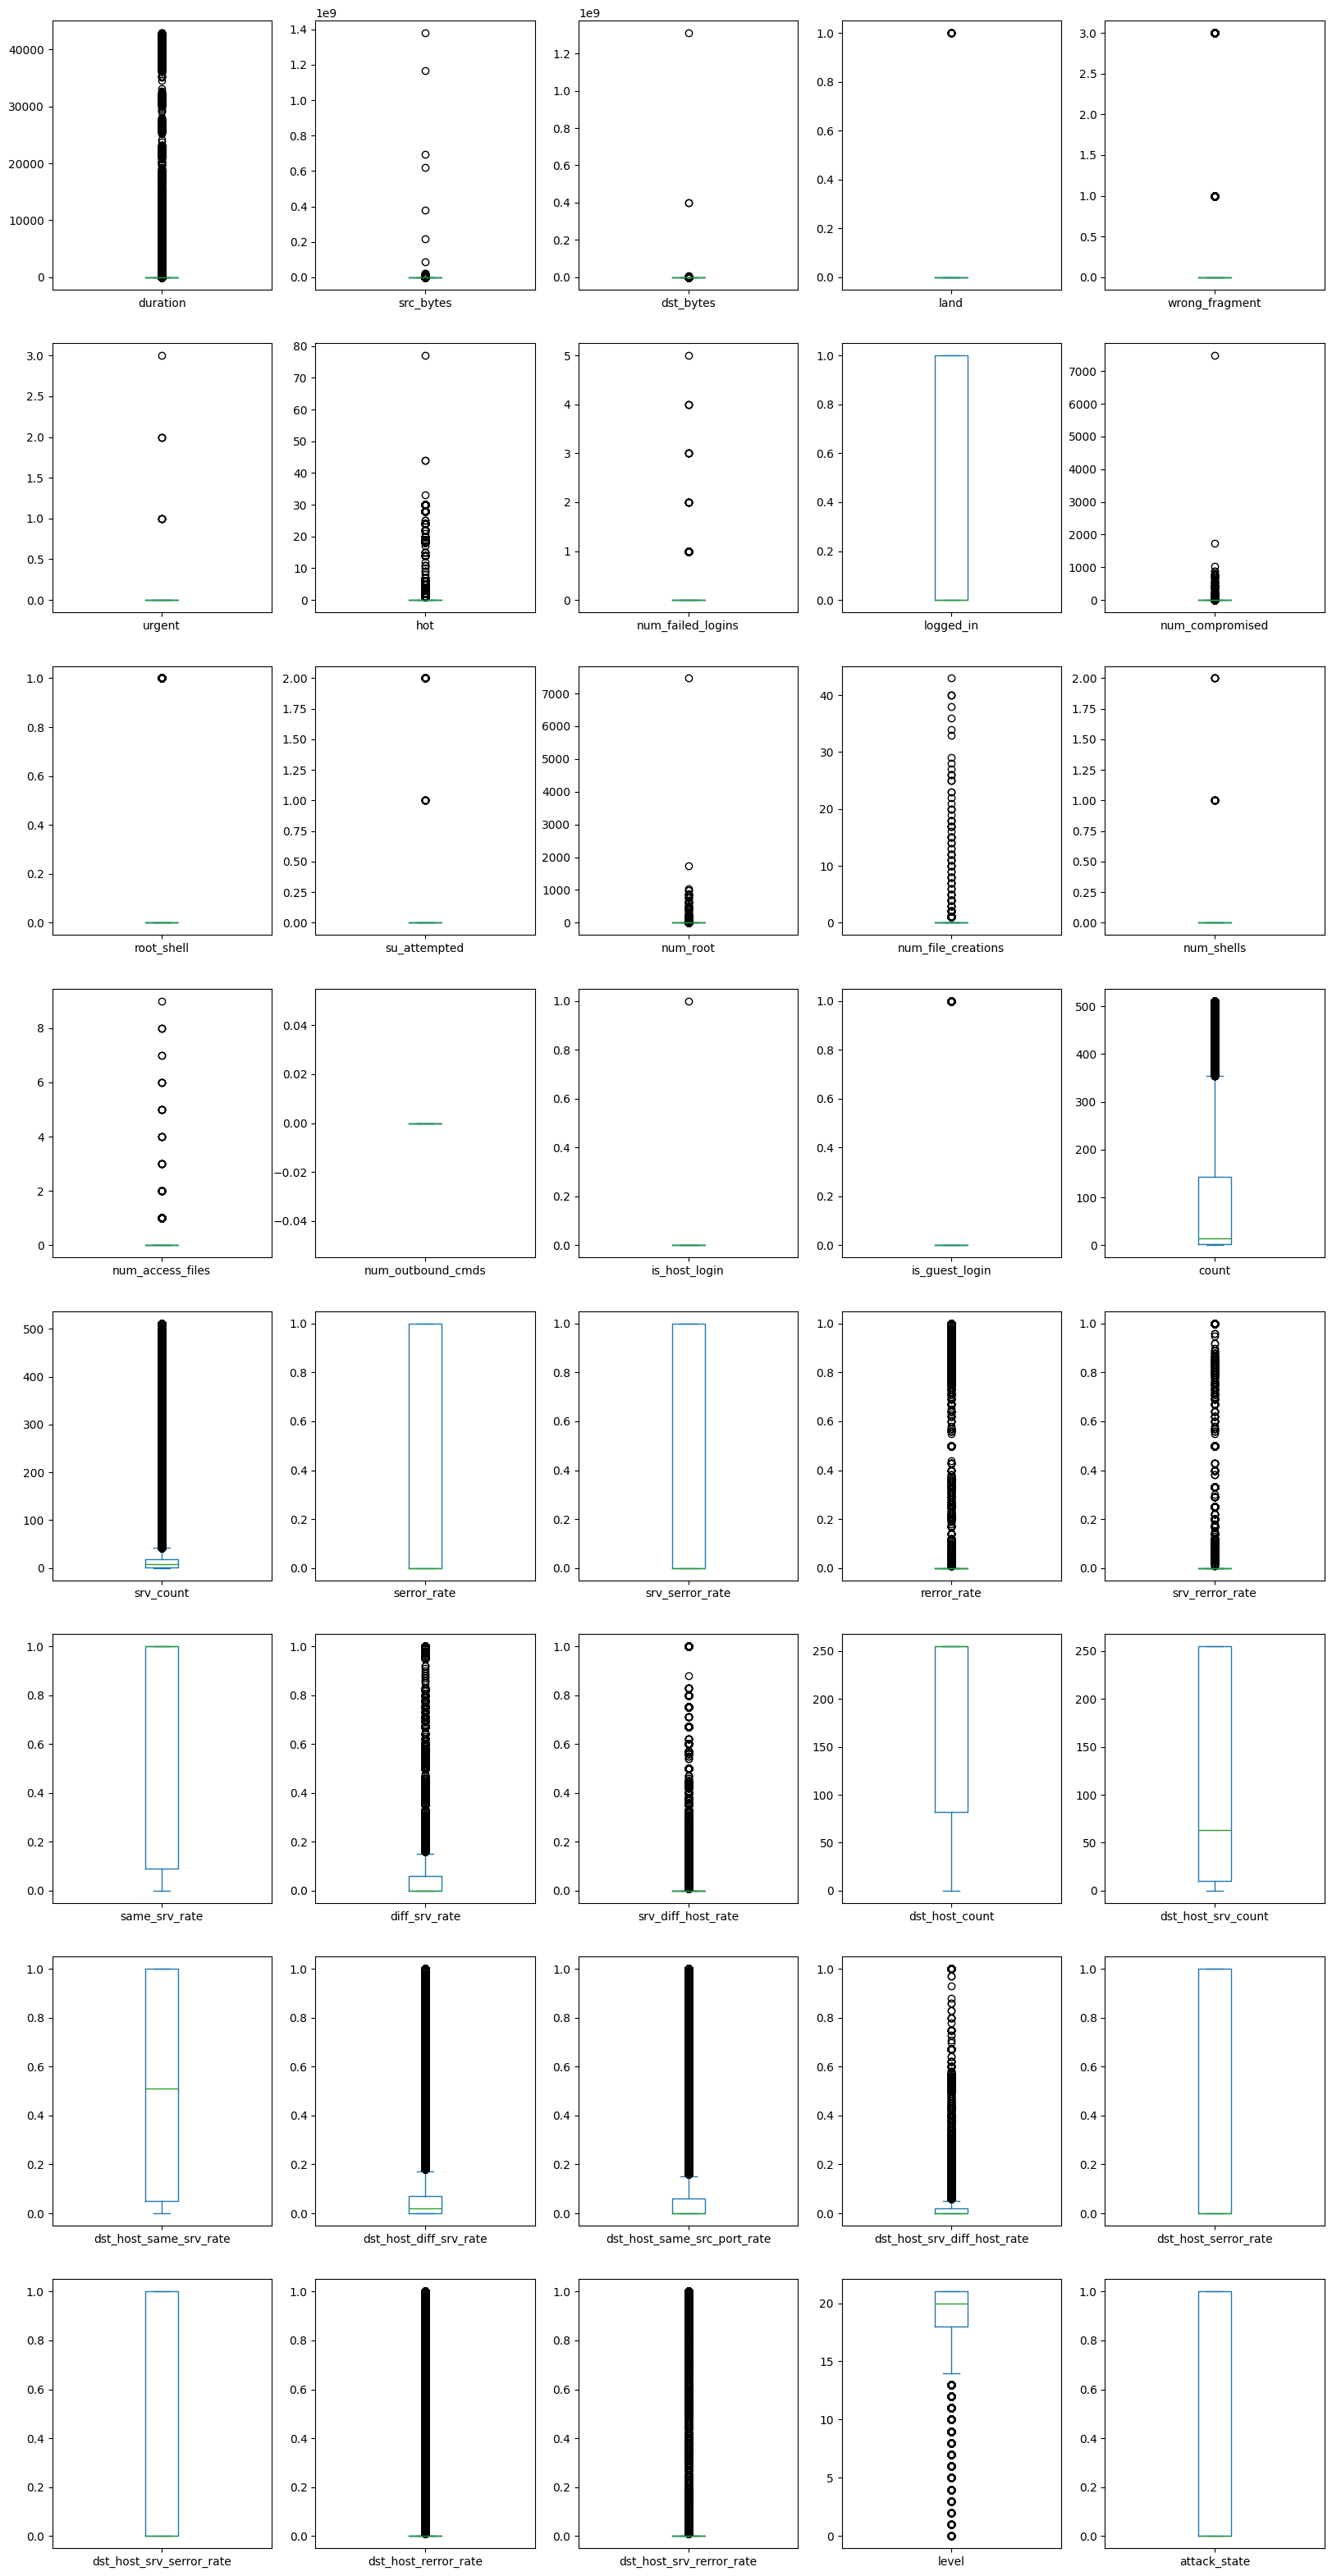

In [26]:
train_df.plot(kind='box', subplots=True, layout=(8,5), figsize=(20,40))
plt.show()

In [27]:
test_df.shape

(22544, 44)

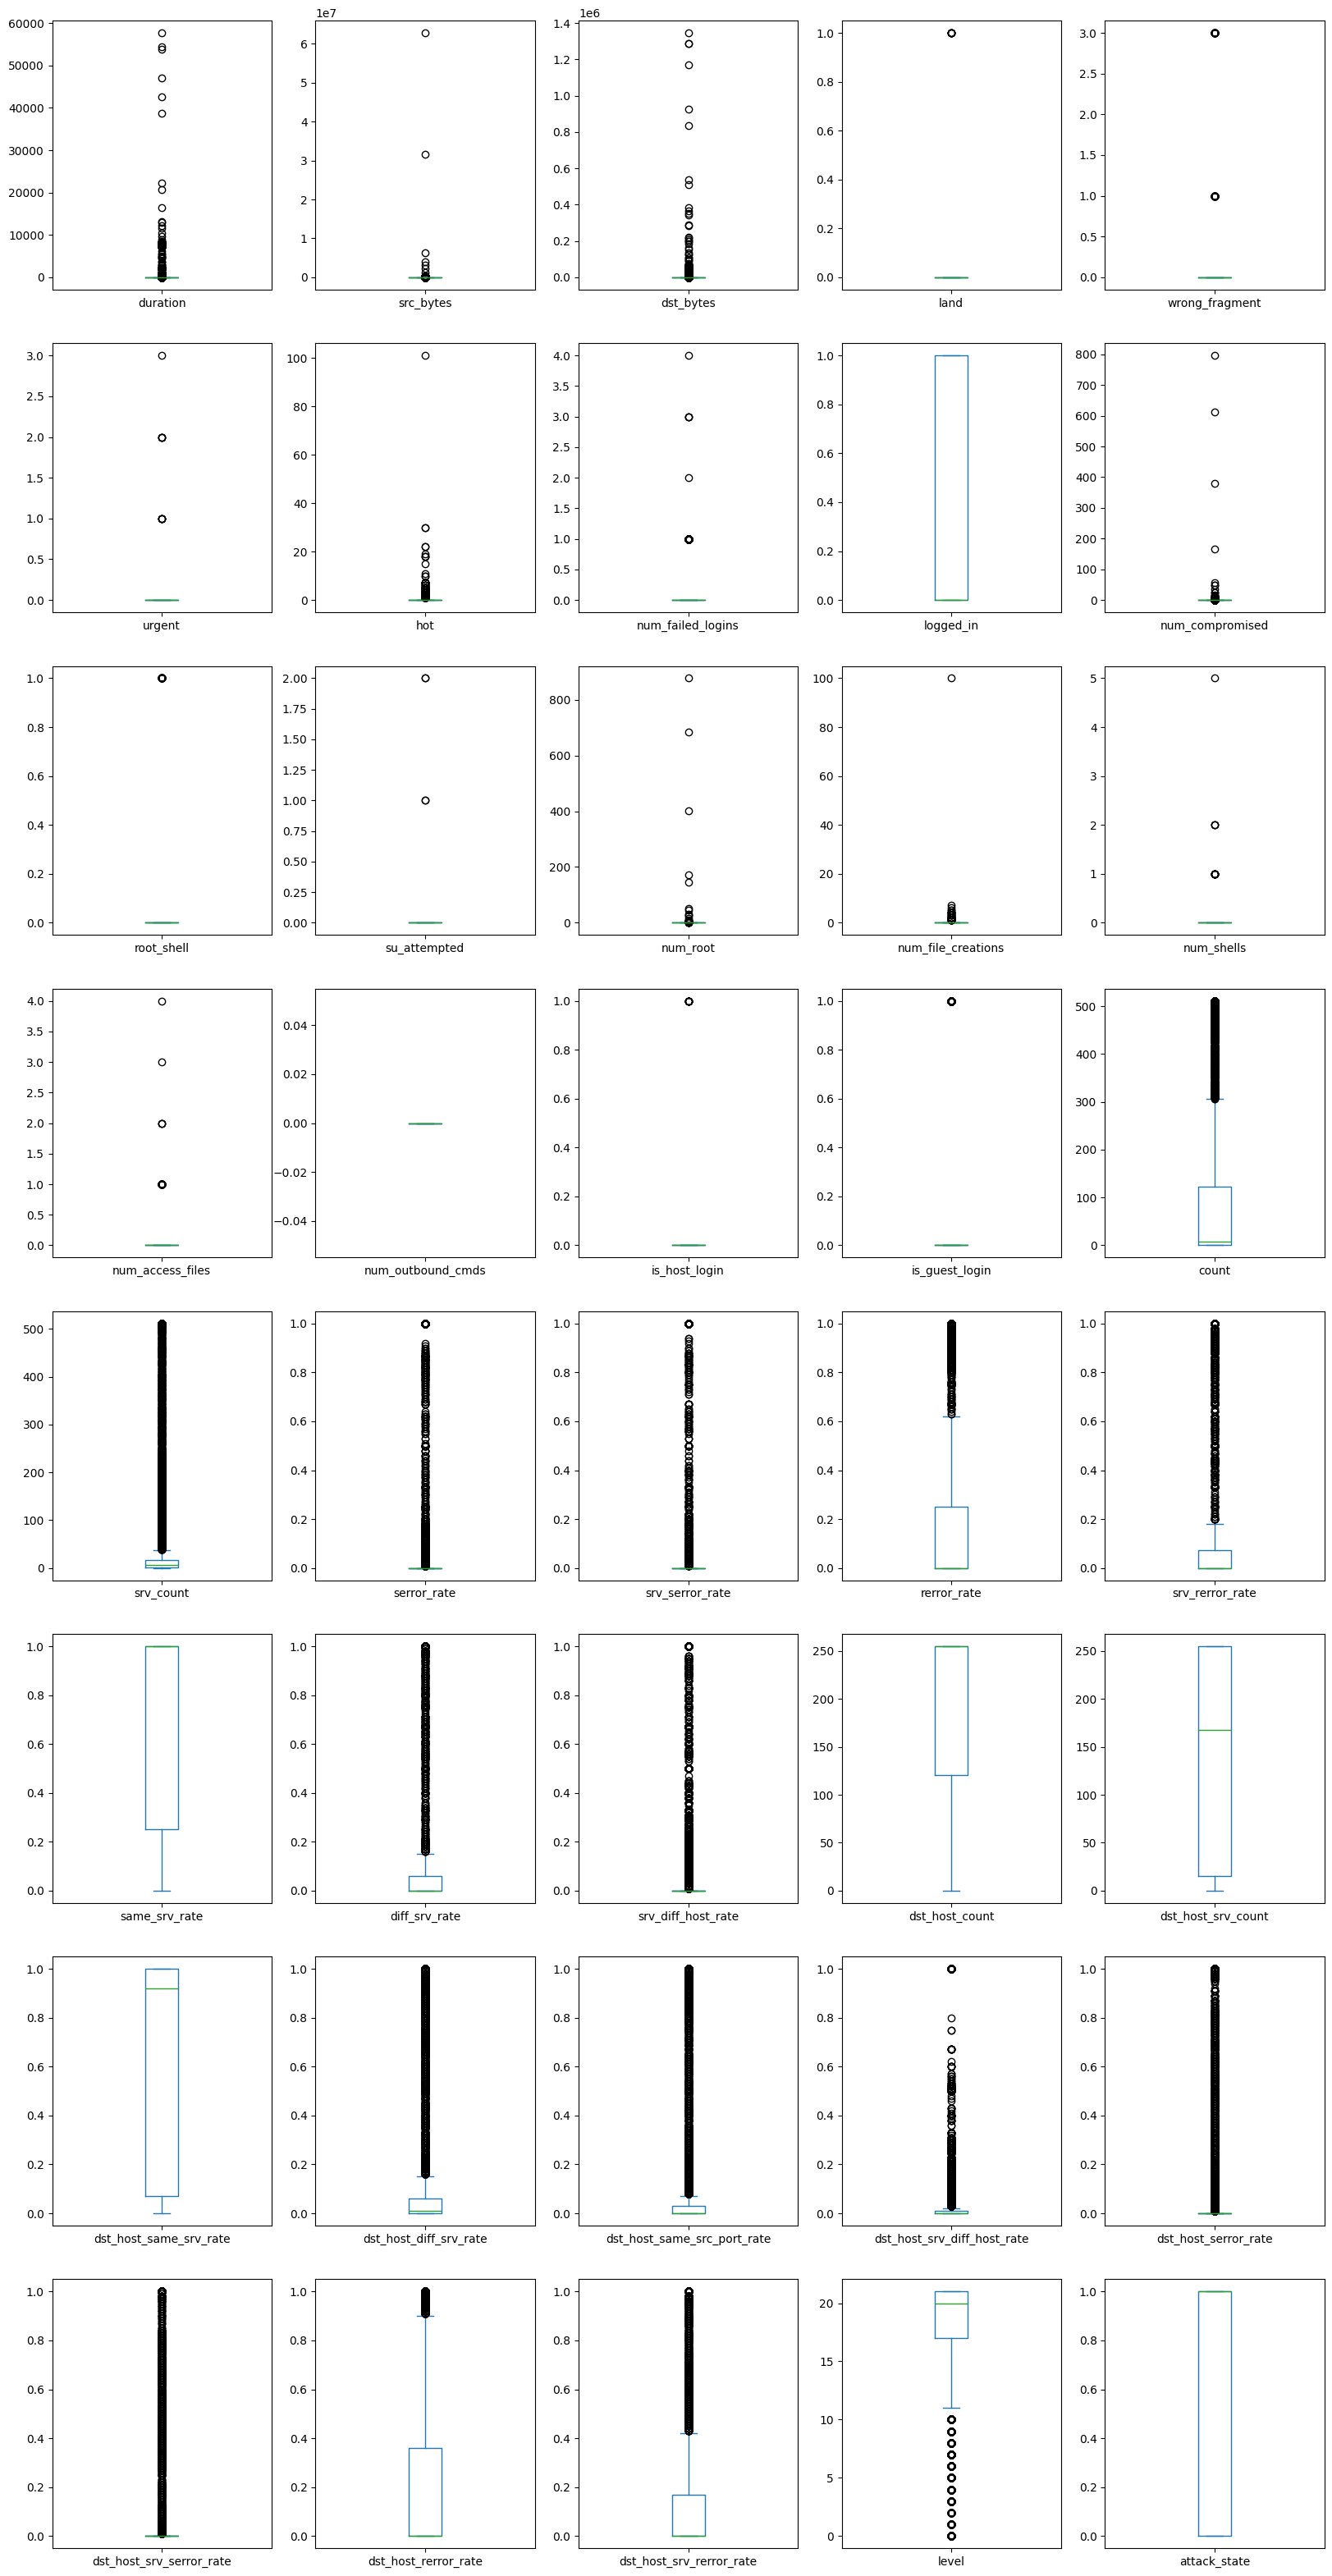

In [28]:
test_df.plot(kind='box',subplots=True, layout=(8,5),figsize=(20,40))
plt.show()

In [ ]:
# One hot Encoding
train_df = pd.get_dummies(train_df,columns=['protocol_type','service','flag'], prefix="", prefix_sep="")
test_df = pd.get_dummies(test_df,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [36]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
train_df['attack'] = attack_LE.fit_transform(train_df["attack"])
test_df['attack'] = attack_LE.fit_transform(test_df["attack"])

In [37]:
# Data Splitting
X_train = train_df.drop('attack', axis = 1)
X_train = train_df.drop('level', axis = 1)
X_train = train_df.drop('attack_state', axis = 1)

X_test = test_df.drop('attack', axis = 1)
X_test = test_df.drop('level', axis = 1)
X_test = test_df.drop('attack_state', axis = 1)


Y_train = train_df['attack_state']
Y_test = test_df['attack_state']

In [38]:
X_train_train, X_test_train, Y_train_train, Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test, X_test_test, Y_train_test, Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

In [39]:
# Data scaling
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [40]:
X_train_train.shape, Y_train_train.shape

((94479, 124), (94479,))

In [41]:
X_test_train.shape, Y_test_train.shape

((31494, 124), (31494,))

In [42]:
X_train_test.shape, Y_train_test.shape

((16908, 118), (16908,))

In [43]:
X_test_test.shape, Y_test_test.shape

((5636, 118), (5636,))

In [46]:
# Convert all boolean columns to integers (0 and 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [47]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125973
Model:                            GLM   Df Residuals:                   125853
Model Family:                Gaussian   Df Model:                          119
Link Function:               Identity   Scale:                        0.021062
Method:                          IRLS   Log-Likelihood:                 64459.
Date:                Fri, 04 Oct 2024   Deviance:                       2650.7
Time:                        21:25:35   Pearson chi2:                 2.65e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9668      0.006    163.903      0.000       0.955       0.978
duration                    -4.486e-06   1.98e-07    -22.621      0.000   -4.87e-06    -4.1e-06
src_bytes                   -1.215e-10   7.13e-11     -1.704      0.088   -2.61e-10    1.82e-11
dst_bytes                   -1.711e-10   1.02e-10     -1.681      0.093   -3.71e-10    2.84e-11
land                           -0.4613      0.030    -15.546      0.000      -0.519      -0.403
wrong_fragment                  0.1289      0.002     66.055      0.000       0.125       0.133
urgent                         -0.0418      0.029     -1.448      0.148      -0.098       0.015
hot                             0.0132      0.000     34.799      0.000       0.012       0.014
num_failed_logins               0.0047      0.009      0.504      0.614      -0.014       0.023
logged_in                       0.1242      0.003     38.510      0.000       0.118       0.131
num_compromised                 0.0036      0.001      6.955      0.000       0.003       0.005
root_shell                     -0.0385      0.014     -2.684      0.007      -0.067      -0.010
su_attempted                   -0.0341      0.015     -2.313      0.021      -0.063      -0.005
num_root                       -0.0036      0.001     -6.932      0.000      -0.005      -0.003
num_file_creations             -0.0105      0.001    -12.023      0.000      -0.012      -0.009
num_shells                     -0.0866      0.019     -4.634      0.000      -0.123      -0.050
num_access_files                0.0226      0.006      3.974      0.000       0.011       0.034
num_outbound_cmds            -9.61e-16    5.4e-16     -1.781      0.075   -2.02e-15    9.67e-17
is_host_login                  -0.2730      0.145     -1.880      0.060      -0.558       0.012
is_guest_login                 -0.2938      0.011    -27.666      0.000      -0.315      -0.273
count                           0.0004   8.38e-06     48.782      0.000       0.000       0.000
srv_count                      -0.0001   1.25e-05     -7.998      0.000      -0.000   -7.55e-05
serror_rate                     0.0424      0.005      8.303      0.000       0.032       0.052
srv_serror_rate                 0.2054      0.007     28.814      0.000       0.191       0.219
rerror_rate                    -0.1296      0.006    -22.266      0.000      -0.141      -0.118
srv_rerror_rate                 0.1490      0.009     16.802      0.000       0.132       0.166
same_srv_rate                  -0.1939      0.002    -84.228      0.000      -0.198      -0.189
diff_srv_rate                  -0.1171      0.004    -29.251      0.000      -0.125      -0.109
srv_diff_host_rate              0.0705      0.002     31.057      0.000       0.066       0.075
dst_host_co

In [58]:
# Evaluation Function
# Evaluation Function
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value = Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test, Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test, Pred_Value)
    Precision = metrics.precision_score(Y_test, Pred_Value)
    F1_score = metrics.f1_score(Y_test, Pred_Value)
    Recall = metrics.recall_score(Y_test, Pred_Value)
    
    print(f"""
          ==================================================
          The {Model_Name} Model Accuracy   =  {np.round(Accuracy, 3)}
          The {Model_Name} Model Sensitivity =  {np.round(Sensitivity, 3)}
          The {Model_Name} Model Precision   =  {np.round(Precision, 3)}
          The {Model_Name} Model F1 Score    =  {np.round(F1_score, 3)}
          The {Model_Name} Model Recall      =  {np.round(Recall, 3)}
          ==================================================
          """)
    
    # Confusion matrix
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix, class_names=['Normal', 'Attack'], figsize=(5.55, 5), colorbar="blue")
    
    # ROC Curve
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)  # Added Y_test here
    plt.show()


In [49]:
# Grid Search Function

def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid = Parameters, cv = 3, n_jobs = -1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

In [50]:
# Logistic Fregression for binary classification

LR = LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [51]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8590692111474507, 0.8587032450625516)


          The Logistic Regression Model Accuracy   =  0.859
          The Logistic Regression Model Sensitivity =  0.916
          The Logistic Regression Model Precision   =  0.808
          The Logistic Regression Model F1 Score    =  0.858
          The Logistic Regression Model Recall      =  0.916
          


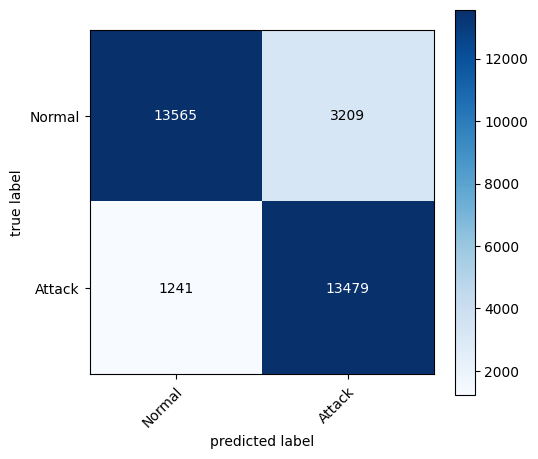

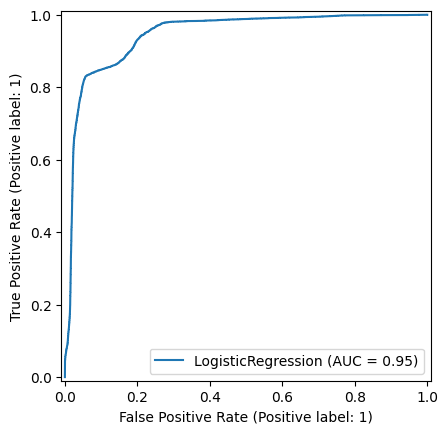

In [59]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

In [61]:
print(f"overrall score: {(0.859 + 0.916 + 0.808 + 0.858 + 0.916) / 5.0}")

overrall score: 0.8714000000000001


In [62]:
# Decision Tree Classifier

DT = DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [63]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.8878586775897289, 0.8858512732583984)


          The Decision Tree Classifier Model Accuracy   =  0.886
          The Decision Tree Classifier Model Sensitivity =  0.833
          The Decision Tree Classifier Model Precision   =  0.915
          The Decision Tree Classifier Model F1 Score    =  0.872
          The Decision Tree Classifier Model Recall      =  0.833
          


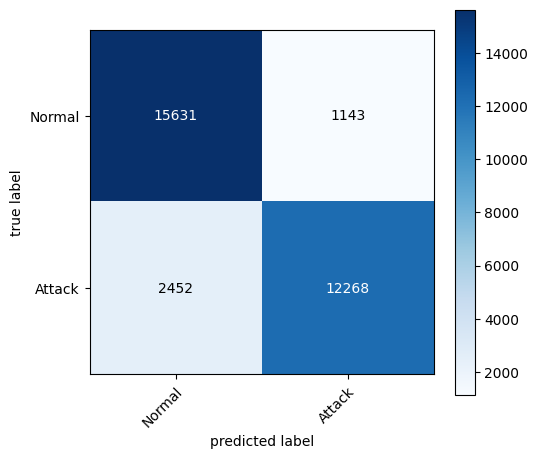

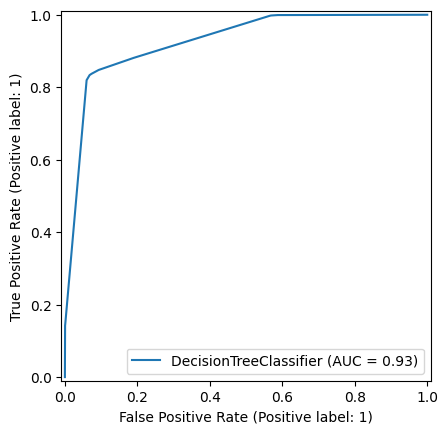

In [64]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

In [65]:
print(f"overrall score: {(0.886 + 0.833 + 0.915 + 0.872 + 0.833) / 5.0}")

overrall score: 0.8677999999999999


[Text(0.4791666666666667, 0.9, 'x[20] <= -0.281\ngini = 0.498\nsamples = 94479\nvalue = [50569, 43910]'),
 Text(0.22916666666666666, 0.7, 'x[34] <= 0.025\ngini = 0.459\nsamples = 33327\nvalue = [21409, 11918]'),
 Text(0.3541666666666667, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[55] <= 0.5\ngini = 0.343\nsamples = 25703\nvalue = [20060, 5643]'),
 Text(0.08333333333333333, 0.3, 'x[57] <= 0.5\ngini = 0.35\nsamples = 24988\nvalue = [19345, 5643]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.333\nsamples = 24080\nvalue = [18993, 5087]'),
 Text(0.125, 0.1, 'gini = 0.475\nsamples = 908\nvalue = [352, 556]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 715\nvalue = [715, 0]'),
 Text(0.3333333333333333, 0.5, 'x[30] <= -0.458\ngini = 0.291\nsamples = 7624\nvalue = [1349, 6275]'),
 Text(0.25, 0.3, 'x[122] <= -0.5\ngini = 0.082\nsamples = 6081\nvalue = [262, 5819]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.009\nsamples = 5691\nvalue = [26, 5665]'),
 Text(0.2916666666666667, 0.1, 'gini = 0

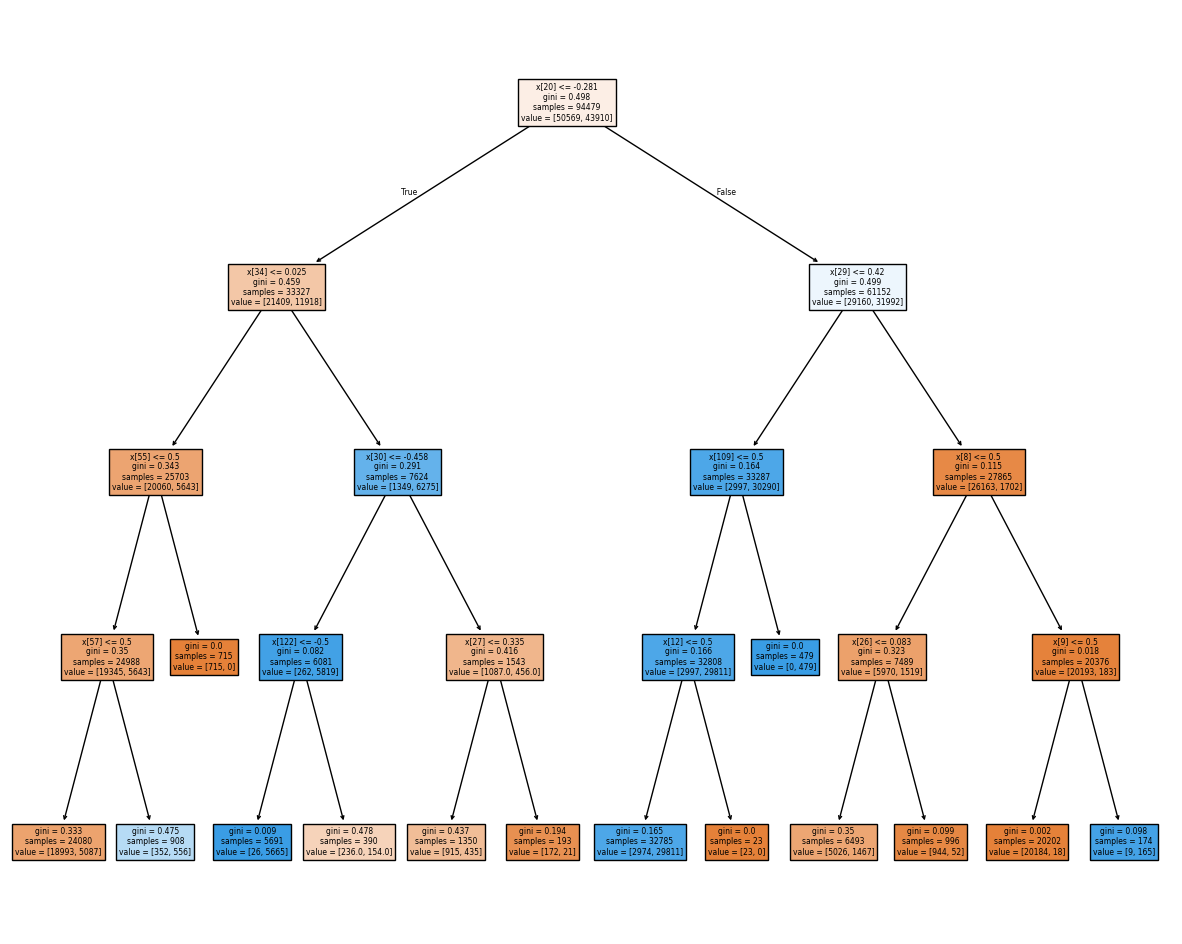

In [66]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

In [67]:
# Random Forest Classifier

max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters = { 'max_depth': max_depth}

In [68]:
RF = RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=11)

In [69]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [70]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 0.9999364958404775)


          The Random Forest Classifier Model Accuracy   =  1.0
          The Random Forest Classifier Model Sensitivity =  1.0
          The Random Forest Classifier Model Precision   =  1.0
          The Random Forest Classifier Model F1 Score    =  1.0
          The Random Forest Classifier Model Recall      =  1.0
          


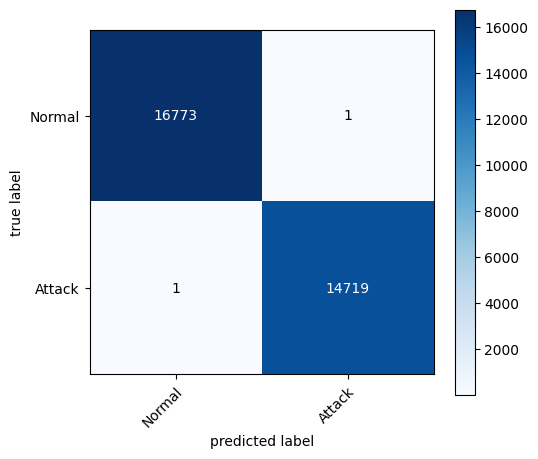

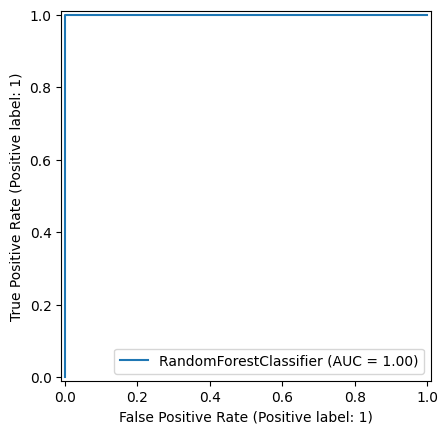

In [71]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

In [74]:
print(f"overrall score: {(1.0 + 1.0 + 1.0 + 1.0 + 1.0) / 5.0}")

overrall score: 1.0


In [72]:
# KNN Algorithm with n = 6

KNN = KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [73]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9959991109135363, 0.9946021464405919)


          The KNN Model Accuracy   =  0.995
          The KNN Model Sensitivity =  0.992
          The KNN Model Precision   =  0.996
          The KNN Model F1 Score    =  0.994
          The KNN Model Recall      =  0.992
          


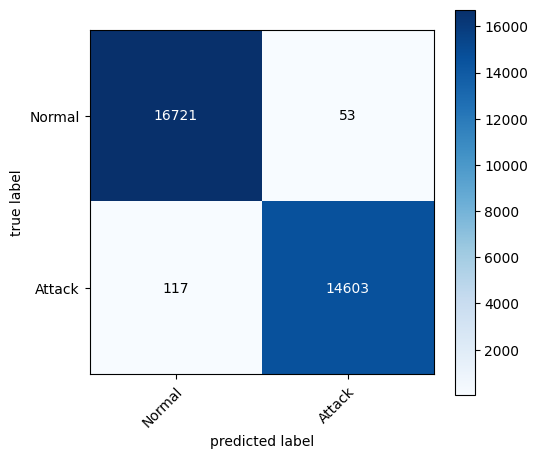

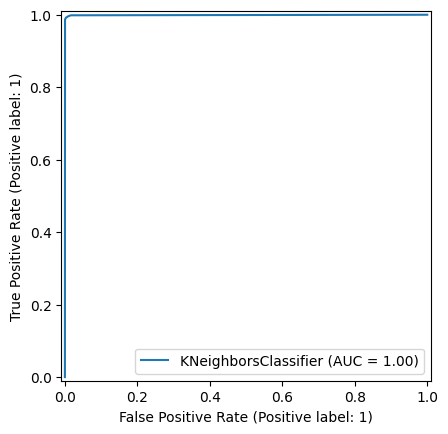

In [75]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

In [76]:
print(f"overrall score: {(0.995 + 0.992 + 0.996 + 0.994 + 0.992) / 5.0}")

overrall score: 0.9938


In [78]:
# export the best model (Random Forest Classifier

with open('Random_Forest.pkl','wb') as f:
    pickle.dump(RF,f)